# [Ejemplo de estandarización y normalización en el aprendizaje automático con Python](https://medium.com/@aa.aliakkaya/standardization-and-normalization-in-machine-learning-with-python-example-5508539b52e4)

<img src = 'https://miro.medium.com/max/1400/1*gGYedW3xbu0PDNl-G3Q2Ng.png'>

Cada viaje de aprendizaje automático comienza con el preprocesamiento de datos. El escalado de características es uno de los pasos más importantes en el preprocesamiento. En este blog, descubriremos 2 técnicas diferentes de escalado de características.

Aquí está el esquema del blog:

Normalización
Normalización
Cuándo utilizar estas técnicas
Cuál usar cuando
Resumen
Normalización (Normalización Mín-Máx.)

En este enfoque, las características se reducen a valores entre [0,1].
La fórmula se utiliza de la siguiente manera:

$$ z = \frac{x - \min(x)}{\max(x) - \min(x)} $$


Cuando la función x = min(x), la función devuelve 0 y el valor mínimo se convierte en valor 0.

Cuando la función x =max(x), devuelve 1 y los valores máximos se convierten en valor 1.

Otros valores se convierten en valores entre 0 y 1 en consecuencia.

Estandarización (Normalización Z-Score)

Aquí todos los valores se reducirán de tal manera que tendrán la característica de una distribución normal estándar con media(μ) =0, desviación estándar(σ)=1 (Casi). En esta técnica, no hay límites mínimos o máximos, se trata de distribución.
La fórmula se utiliza de la siguiente manera:

$$ z = \frac{x_{i} - \mu}{\sigma} $$


Veamos algunos ejemplos de código:



In [31]:
import pandas as pd 

import matplotlib.pyplot as plt 

import seaborn as sns

In [2]:
from sklearn.datasets import load_iris 

In [20]:
namesToMethod = ['sepal-legth', 'sepal-width', 'petal-legth', 'petal-width', 'class']

In [21]:
X,y = load_iris(return_X_y = True, as_frame = True) 
# para obtener una tupla con una dataframe y una serie
# el dataframe para los atributos y la serie para la variable target

In [22]:
X 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [26]:
dataset = pd.concat([X,y], axis = 1, names = namesToMethod)  
# parámetro axis = 1 para concatenar vectores uno al lado del otro
dataset 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
dataset.drop(['target'], axis = 1, inplace = True) 

Cuando miramos nuestros datos aquí están la visualización y las estadísticas:

In [28]:
dataset.describe() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


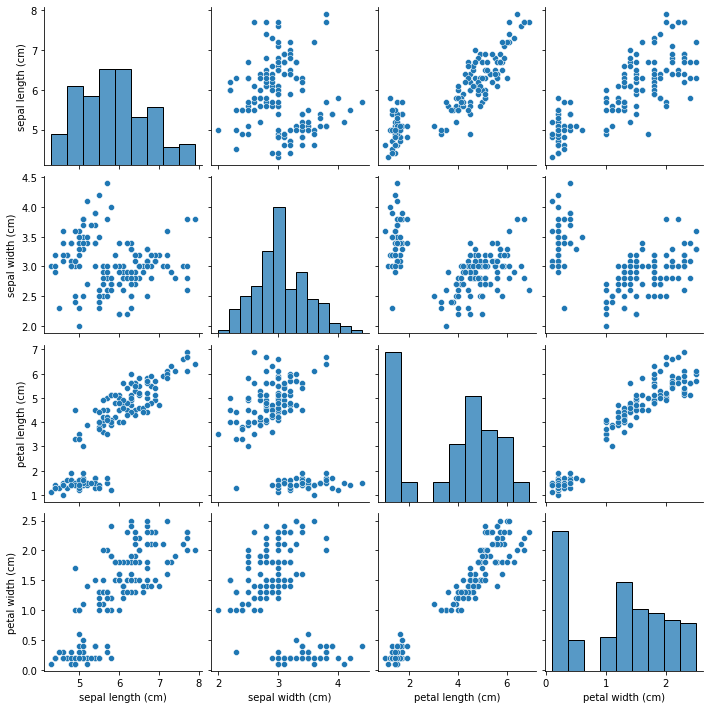

In [32]:
sns.pairplot(dataset)
plt.savefig('pairplot.png')

# Código de normalización:

In [33]:
from sklearn.preprocessing import MinMaxScaler 

In [34]:
scaler = MinMaxScaler() 

In [35]:
normalized_dataset = scaler.fit_transform(dataset) 

In [36]:
normalized_dataset = pd.DataFrame(normalized_dataset,\
                                  columns =['sepal-leght', 'sepal-width',\
                                            'petal-leght', 'petal-width'] )

Después del proceso de normalización, nuestros valores mínimos y máximos se cambian.

In [37]:
normalized_dataset.describe() 

,sepal-leght,sepal-width,petal-leght,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


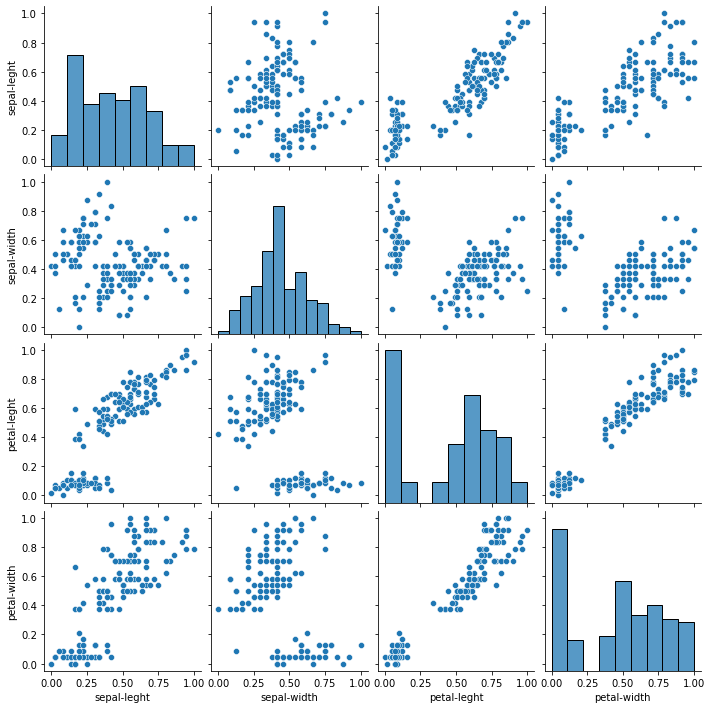

In [38]:
sns.pairplot(normalized_dataset)

# Comparemos los gráficos de dispersión

AttributeError: 'AxesSubplot' object has no attribute 'pairplot'

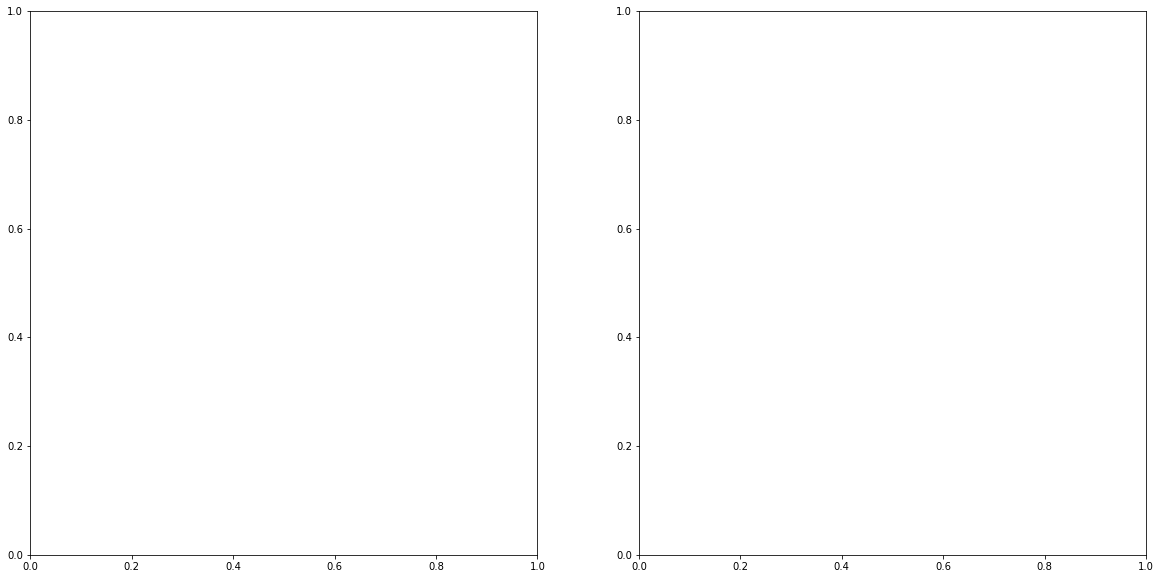

In [44]:
import matplotlib.pyplot as plt 
import seaborn as sns 
fig,ax = plt.subplots(1,2,figsize = (20,10)) 
ax[0].pairplot(dataset)

# Código de estandarización:

In [45]:
from sklearn.preprocessing import StandardScaler 

In [46]:
stn_scaler = StandardScaler() 

In [47]:
standardized_dataset = stn_scaler.fit_transform(dataset) 

In [49]:
standardized_dataset = pd.DataFrame(standardized_dataset, \
                                   columns = namesToMethod[:-1])

standardized_dataset 

,sepal-legth,sepal-width,petal-legth,petal-width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


Después del proceso de estandarización, nuestra media y desviación estándar cambiaron.

In [50]:
standardized_dataset.describe() 

,sepal-legth,sepal-width,petal-legth,petal-width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


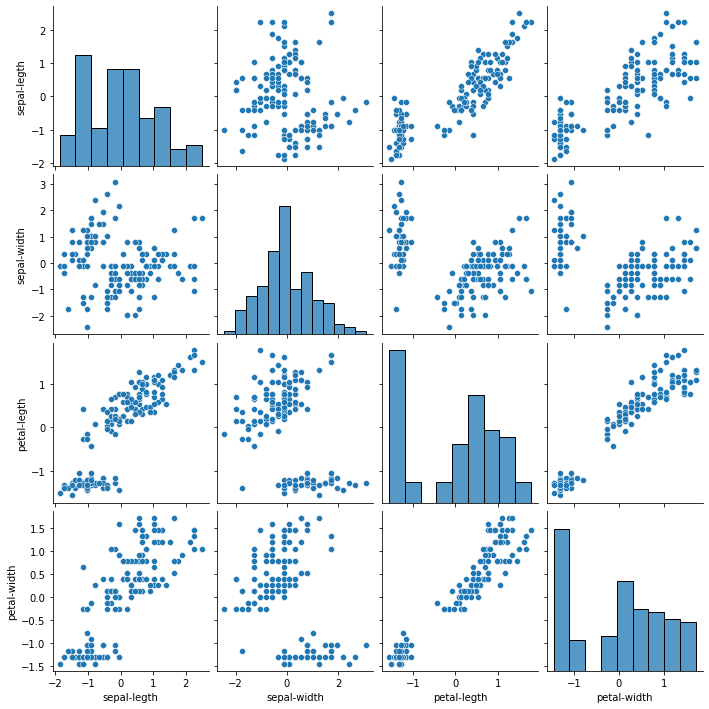

In [51]:
sns.pairplot(standardized_dataset) 

# ¿Cuándo usar Feature Scaling?

El escalado de características se utiliza cuando un algoritmo utiliza el cálculo de gradiente.

Los algoritmos como la regresión lineal, la regresión logística y las redes neuronales artificiales necesitan escalado de características como preprocesamiento.

Sin embargo, los árboles de decisión, los bosques aleatorios, SVM y K-means Clustering no necesitan un escalado de características, ya que la magnitud de las características no tiene un impacto en el algoritmo.

# ¿Cuál usar cuándo?

En realidad, no hay reglas estrictas con respecto a la elección de la estandarización o la normalización. 

Sin embargo, tenemos algunos consejos.

Si los datos siguen la distribución gaussiana, entonces la estandarización sería más significativa.

Además, la estandarización no se ve afectada por valores atípicos. Por lo tanto, si tiene muchos valores atípicos, aún puede optar por la estandarización.

Si usas Redes Neuronales, puedes optar por la normalización ya que no se asume ninguna distribución de datos.